<a href="https://colab.research.google.com/github/RayRay887/AI-Projects/blob/main/NLP_Notes_And_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Notes

NLP Bias Exmaples:



*   Models using violent language to complete texts involving muslims
https://arxiv.org/abs/2101.05783 

*   Gender bias in translation models
https://towardsdatascience.com/gender-bias-in-machine-translation-819ddce2c452

*   Gender bias in Amazon's 2015 attempt to use NLP for resumes

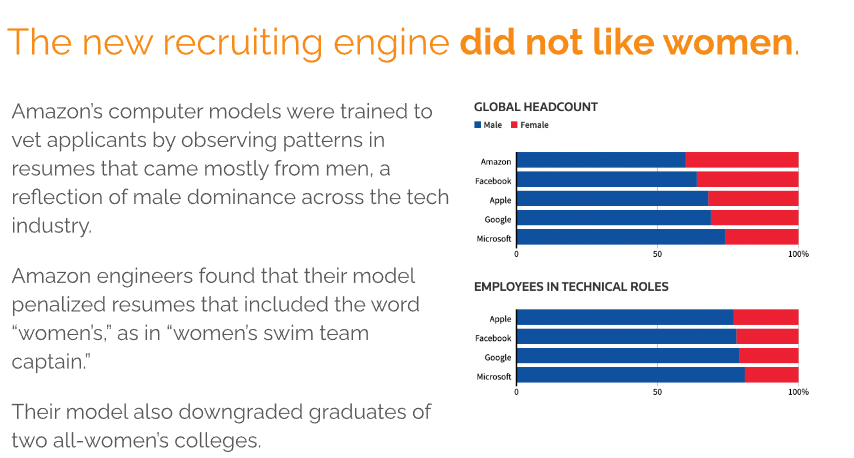







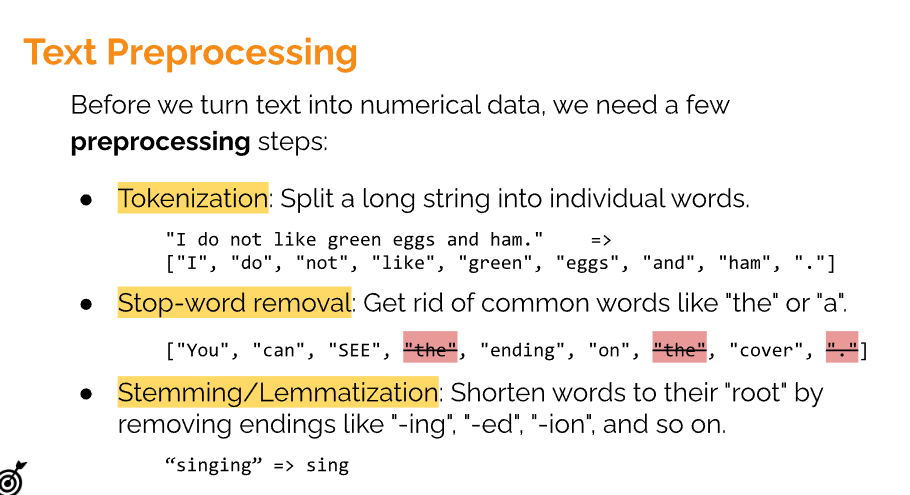

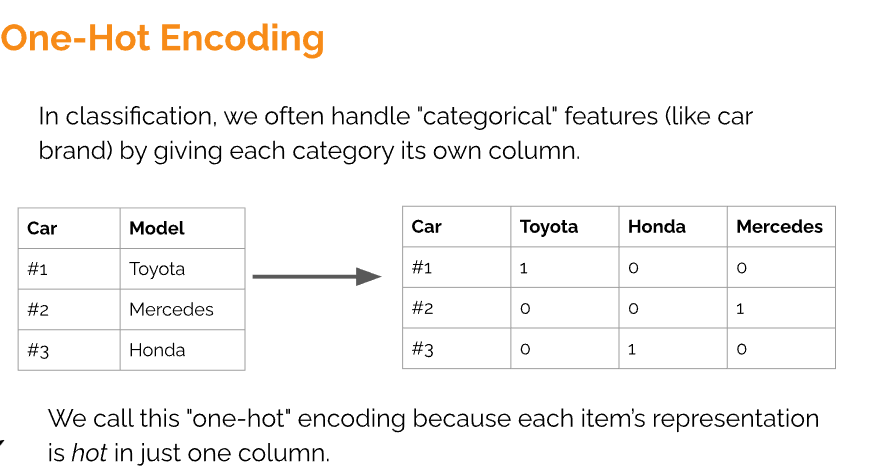

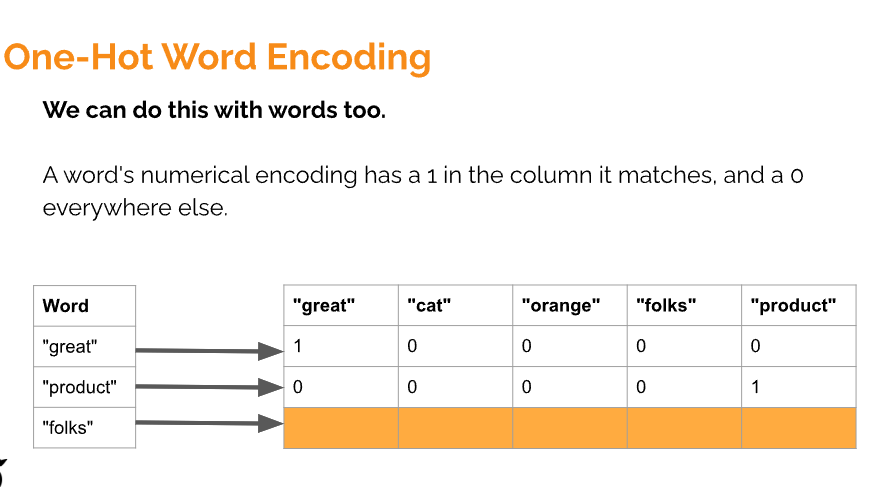

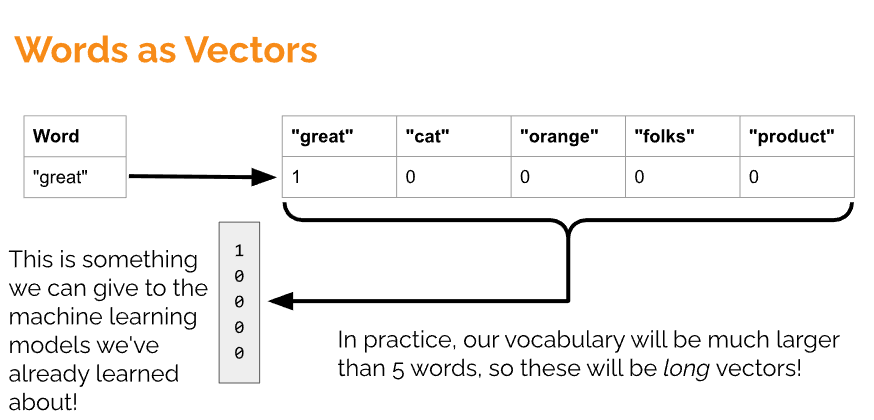

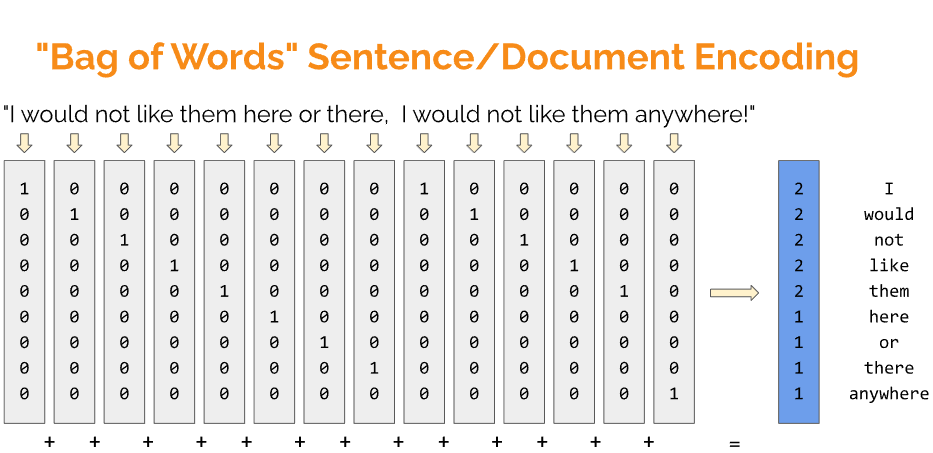

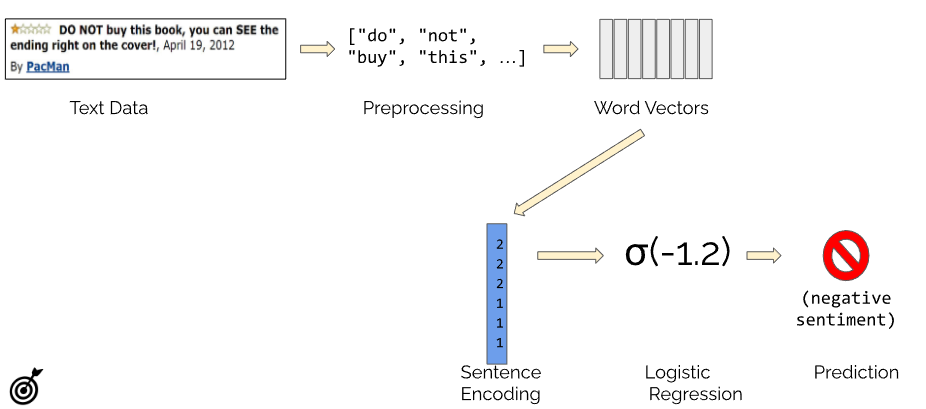

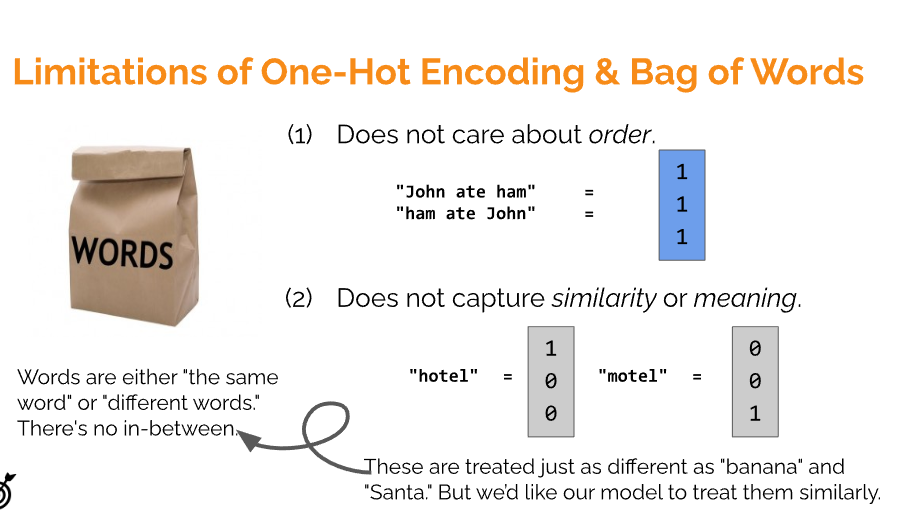

# Word Similarity using Word2Vec
Example: http://epsilon-it.utu.fi/wv_demo/

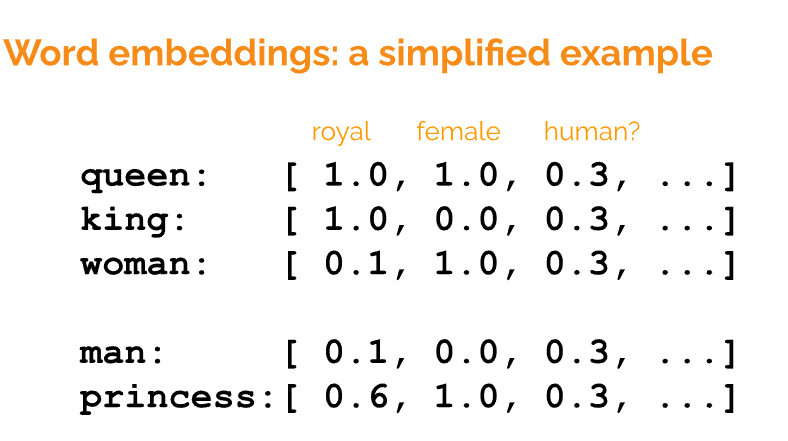

#TensorFlow visualization of Word2Vec
https://projector.tensorflow.org/ 

#Yelp Review Sentiment Classification

I am building a classifier that can predict how a user feels (positively or negatively) about a given restaurant from their review.



![Example of a Yelp review](https://wordstream-files-prod.s3.amazonaws.com/s3fs-public/styles/simple_image/public/images/yelp-reviews-filtered.png)

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy
import wordcloud
import os # Good for navigating your computer's files 
import sys
pd.options.mode.chained_assignment = None #suppress warnings

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
nltk.download('wordnet')
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
!python -m spacy download en_core_web_md
import en_core_web_md
text_to_nlp = en_core_web_md.load()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
# import gdown
#gdown.download('https://drive.google.com/uc?id=1u0tnEF2Q1a7H_gUEH-ZB3ATx02w8dF4p', 'yelp_final.csv', True)
data_file  = 'yelp_final.csv'

!wget https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%203%20-%20NLP/yelp_final.csv


--2022-08-08 03:41:15--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%203%20-%20NLP/yelp_final.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760976 (743K) [text/csv]
Saving to: ‘yelp_final.csv’

yelp_final.csv      100%[===================>] 743.14K  --.-KB/s    in 0.01s   

2022-08-08 03:41:15 (49.6 MB/s) - ‘yelp_final.csv’ saved [760976/760976]



# Data Exploration

In [3]:
# read our data in using 'pd.read_csv('file')'
yelp_full = pd.read_csv(data_file)
yelp_full.head()

,business_id,stars,text,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [4]:
#limiting data to only colums needed
needed_columns = ['stars','text']
yelp = yelp_full[needed_columns]
yelp.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
3,5,General Manager Scott Petello is a good egg!!!...
4,5,Drop what you're doing and drive here. After I...


In [5]:
#@title Differently rated reviews
num_stars =  1#@param {type:"integer"}

for t in yelp[yelp['stars'] == num_stars]['text'].head(20).values:
    print (t) 

U can go there n check the car out. If u wanna buy 1 there? That's wrong move! If u even want a car service from there? U made a biggest mistake of ur life!! I had 1 time asked my girlfriend to take my car there for an oil service, guess what? They ripped my girlfriend off by lying how bad my car is now. If without fixing the problem. Might bring some serious accident. Then she did what they said. 4 brand new tires, timing belt, 4 new brake pads. U know why's the worst? All of those above I had just changed 2 months before!!! What a trashy dealer is that? People, better off go somewhere!
Disgusting!  Had a Groupon so my daughter and I tried it out.  Very outdated and gaudy 80's style interior made me feel like I was in an episode of Sopranos.  The food itself was pretty bad.  We ordered pretty simple dishes but they just had no flavor at all!  After trying it out I'm positive all the good reviews on here are employees or owners creating them.
I've eaten here many times, but none as bad

#### Word Clouds



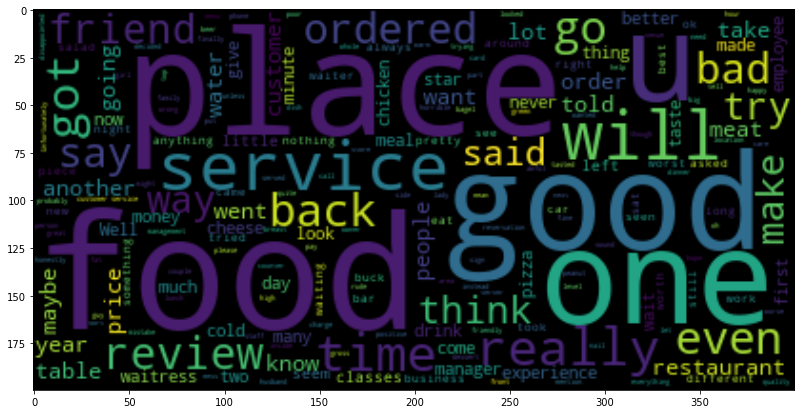

In [6]:
#@title Word cloud for differently rated reviews
num_stars =  1#@param {type:"integer"}
this_star_text = ''
for t in yelp[yelp['stars'] == num_stars]['text'].values: # form field cell
    this_star_text += t + ' '
    
wordcloud = WordCloud()    
wordcloud.generate_from_text(this_star_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')

### Preparing to Classify
predict the sentiment - **positive** or **negative** - based on a review's text. 

In order to reduce our problem to a **binary classification** (two classes) problem

 - label 4 and 5 star reviews as 'good'
 - label 1, 2, 3 star reviews as 'bad'

In [7]:
def is_good_review(num_stars):
    if num_stars > 3: 
        return True
    else:
        return False

yelp['is_good_review'] = yelp['stars'].apply(is_good_review)
yelp.head()

,stars,text,is_good_review
0,5,My wife took me here on my birthday for breakf...,True
1,5,I have no idea why some people give bad review...,True
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",True
3,5,General Manager Scott Petello is a good egg!!!...,True
4,5,Drop what you're doing and drive here. After I...,True


## Text Preprocessing

## Tokenization


In [8]:
#@title Basic tokenization example
example_text = "All the people I spoke to were super nice and very welcoming." #@param {type:"string"}
tokens = word_tokenize(example_text)
tokens

['All',
 'the',
 'people',
 'I',
 'spoke',
 'to',
 'were',
 'super',
 'nice',
 'and',
 'very',
 'welcoming',
 '.']

## Stopwords


In [9]:
#@title Check if a word is a stop word
example_word = "not" #@param {type:'string'}
if example_word.lower() in STOP_WORDS:
  print ('"' + example_word + '" is a stop word.')
else:
  print ('"' + example_word + '" is NOT a stop word.')

"not" is a stop word.


## Vectors


### Bag of Words

In a **bag of words** approach, we count how many times each word was used in each review.

Suppose we want to represent two **reviews**: 
- "The food was great. The ambience was also great."
- "Great ambience, but not great food!"

First we define our vocabulary. This is *each unique word* in the review. So our **vocabulary** is: 
- [also, ambience, but, food, great, not, the, was].




In [10]:
#preparing data
X_text = yelp['text']
y = yelp['is_good_review']

In [11]:
#text cleaning function
def tokenize(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these 
            clean_tokens.append(token.lemma_)
    return clean_tokens


In [12]:
#using countVectorizer
bow_transformer = CountVectorizer(analyzer=tokenize, max_features=800).fit(X_text)

In [13]:
#total vocabulary
bow_transformer.vocabulary_

{'\n': 0,
 '\n\n': 1,
 ' ': 2,
 ' \n': 3,
 ' \n\n': 4,
 '  ': 5,
 '$': 6,
 '+': 7,
 '1': 8,
 '1/2': 9,
 '10': 10,
 '11': 11,
 '12': 12,
 '15': 13,
 '2': 14,
 '20': 15,
 '25': 16,
 '3': 17,
 '30': 18,
 '4': 19,
 '5': 20,
 '50': 21,
 '6': 22,
 '7': 23,
 '8': 24,
 '9': 25,
 '=': 26,
 'AZ': 27,
 'Arizona': 28,
 'BBQ': 29,
 'Burger': 30,
 'Chandler': 31,
 'Chicken': 32,
 'Chili': 33,
 'Food': 34,
 'Friday': 35,
 'Green': 36,
 'Grill': 37,
 'Happy': 38,
 'Hour': 39,
 'Mesa': 40,
 'Mexican': 41,
 'New': 42,
 'Old': 43,
 'Phoenix': 44,
 'Saturday': 45,
 'Scottsdale': 46,
 'Service': 47,
 'Sunday': 48,
 'Tempe': 49,
 'Thai': 50,
 'Town': 51,
 'Valley': 52,
 'White': 53,
 'Yelp': 54,
 'able': 55,
 'absolutely': 56,
 'actually': 57,
 'add': 58,
 'addition': 59,
 'admit': 60,
 'adult': 61,
 'afternoon': 62,
 'ago': 63,
 'agree': 64,
 'amazing': 65,
 'ambiance': 66,
 'app': 67,
 'appetizer': 68,
 'area': 69,
 'arrive': 70,
 'art': 71,
 'asada': 72,
 'asian': 73,
 'ask': 74,
 'atmosphere': 75,
 'att

In [14]:
len(bow_transformer.vocabulary_)

800

In [15]:
#vocabulary to bag of words
X = bow_transformer.transform(X_text)

Looking at vector length it is same as vocabulary length.



In [16]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0,3,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,11,0,0,0,0,0,1,0,0,...,2,0,1,1,0,1,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating a Baseline Classifier

Using logistic regression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [18]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [19]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print (accuracy)

# has bad accuracy

0.765


In [21]:
#@title Enter a review to see model's classification
example_review = "This restaurant is good" #@param {type:'string'}
prediction = logistic_model.predict(bow_transformer.transform([example_review]))

if prediction:
  print ("This was a GOOD review!")
else:
  print ("This was a BAD review!")



This was a GOOD review!


# Playing with weights of model

Logistic regression works by multiplying all of inputs by weights, summing the results, and then converting that raw number to a probability score (between 0 and 1)! This means that we can look at the weight assigned to each input (or in our case word) to figure out how that word impacts our model.



<img src='https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%203%20-%20NLP/Linear_logistic_regression.jpg' >

Function takes in the following: <br><br>word: a word from our vocabulary.<br> model: the logistic regression model whose weights we want to query. <br>vocab_dict: a dictionary containg word:index as the key:value pair. 

The function then return the weight that the logistic regression model has learned for the word in question. 



In [22]:
def get_word_weight(word,model,vocab_dict):
  

  if word in vocab_dict:
   
    index=vocab_dict[word]
    weight=model.coef_[0][index]
    
    return weight
  else:
    return "That word is not in our Vocabulary!"


In [23]:
#@title Test by inputing a sentence
sentence = "this is a good place" #@param {type:'string'}
words=tokenize(sentence)
temp_weight_dict={}
for word in words:
  weight=get_word_weight(word,logistic_model,bow_transformer.vocabulary_)
  temp_weight_dict[word]=weight
print(temp_weight_dict,"bias:  "+str(logistic_model.intercept_[0]))


{'good': 0.3805798339460277, 'place': -0.3446200777470105} bias:  0.5641515787401039


###Using a Different Classifier

Multinomial Naive Bayes. Naive Bayes uses Bayes' Theorem of probability to predict the class of new input data. The important assumption that Naive Bayes makes is that all the features are independent: the number of times a review uses "potato" is unrelated to the number of times a review uses "server".

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

In [25]:
#Training model on same data
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print ("The accuracy of the model is " + str(accuracy*100) + "%")

The accuracy of the model is 76.5%


# Logistic Regression with Word Embeddings

In [26]:
text_to_nlp = en_core_web_md.load() #Prepare Spacy

`text_to_nlp` finds information about a sentence, can pick out a specific word:

In [27]:
doc = text_to_nlp("I like apples and cherries and peaches and pie")
token = doc[2] 
print (token)
print (len(token))

apples
6


We can also find the **word embedding** for each word: a 300-dimensional vector that captures the word's meaning

In [28]:
print ('Vector for: ', token)
print (token.vector) 

Vector for:  apples
[-2.3691   -3.3093   -2.3683    3.9687    0.7657   -2.4125   -2.6989
  2.191    -5.2731    1.4548    4.0483   -1.3258   -2.5053    1.8406
  1.456    -1.8792    2.7844   -3.4126    0.47314  -5.9216   -0.40092
  2.6631   -2.8213   -1.6466   -2.3342   -1.857    -2.5771    1.5269
  0.2391   -1.2999    1.267    -1.5071    0.50731  -2.9986    0.96218
 -1.2704    2.9455    0.61234   2.1324   -0.92046   1.439     0.42566
  1.5614    2.0232   -1.1418    1.4407    0.28988  -0.67582   2.2102
 -1.5918    0.069704  0.6616    1.8213   -2.7202   -2.2525    0.44366
 -2.3768    1.4561    5.1407   -1.5928    2.8267    0.84684   2.8155
  0.6176   -0.47365   0.14659  -2.8028   -3.6587    0.56587  -0.95888
  0.031699  2.5489    0.23451   0.025016  2.1471    1.6193   -6.8539
 -1.9494    4.5936   -0.41406  -1.1074    1.0288    0.55435  -0.59505
  2.0455    1.2122   -0.086148  0.45522  -0.038163 -0.071074  2.2994
  2.6239    3.1491   -4.3686   -1.5754    0.4051    4.4168   -3.227
 -2.0252 

#### Similarity


Using function to remove stop words, pronouns, and punctuation, and convert each word to a spaCy object .

In [29]:
def tokenize_vecs(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): 
            clean_tokens.append(token)
    return clean_tokens

Represent each Yelp review with a vector. Since each review consists of multiple words, find a way to create one vector for each review. 

In [30]:
X_word2vec = []
for text in X_text:
  review = tokenize_vecs(text) # returns cleaned list of spacy tokens
  review_vec = [0]*300
  for word in review:
    review_vec += word.vector
  review_vec = review_vec / len(review)
  X_word2vec.append(review_vec)

X_word2vec = np.array(X_word2vec)

In [32]:
#training model
w2v_model = LogisticRegression()

# train-test split
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2vec, y, test_size=0.2, random_state=101)

w2v_model.fit(X_train_word2vec, y_train_word2vec)

w2v_preds = w2v_model.predict(X_test_word2vec) 
accuracy = accuracy_score(y_test_word2vec, w2v_preds)
print (accuracy)

0.76


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Vector Math

Can use text embeddings to explore connections in meaning between different words, including calculating similarity between words and completing [analogies](http://bionlp-www.utu.fi/wv_demo/).

In [33]:
vocab_dict = dict() #initialize dictionary

for word in bow_transformer.vocabulary_:
    vocab_dict[word] = text_to_nlp(word).vector 

for word, vec in vocab_dict.items(): # Iterating through the dictionary to print each key and value
  print ('Word: {}. Vector length: {}'.format(word, len(vec)))

print()
print ('{} words in our dictionary'.format(len(vocab_dict)))

Word: wife. Vector length: 300
Word: take. Vector length: 300
Word: birthday. Vector length: 300
Word: breakfast. Vector length: 300
Word: excellent. Vector length: 300
Word:  . Vector length: 300
Word: perfect. Vector length: 300
Word: sit. Vector length: 300
Word: outside. Vector length: 300
Word: waitress. Vector length: 300
Word: food. Vector length: 300
Word: arrive. Vector length: 300
Word: quickly. Vector length: 300
Word: busy. Vector length: 300
Word: Saturday. Vector length: 300
Word: morning. Vector length: 300
Word: look. Vector length: 300
Word: like. Vector length: 300
Word: place. Vector length: 300
Word: fill. Vector length: 300
Word: pretty. Vector length: 300
Word: early. Vector length: 300
Word: well. Vector length: 300
Word: 

. Vector length: 300
Word: simply. Vector length: 300
Word: good. Vector length: 300
Word: sure. Vector length: 300
Word: use. Vector length: 300
Word: ingredient. Vector length: 300
Word: fresh. Vector length: 300
Word: order. Vector length: 

Calculate the similarity between two words, using their Word2Vec representations.

A common way to calculate the similarity between two vectors is called *cosine similarity*. It depends on the angle between those two vectors when plotted in space. As an example, imagine we had two three-dimensional vectors:

In [34]:
v0 = [2,3,1]
v1 = [2,4,1]

Visualising the data

In [35]:
#Code from https://stackoverflow.com/questions/47319238/python-plot-3d-vectors 
import numpy as np 
import plotly.graph_objs as go

def vector_plot(tvects,is_vect=True,orig=[0,0,0]):
    """Plot vectors using plotly"""

    if is_vect:
        if not hasattr(orig[0],"__iter__"):
            coords = [[orig,np.sum([orig,v],axis=0)] for v in tvects]
        else:
            coords = [[o,np.sum([o,v],axis=0)] for o,v in zip(orig,tvects)]
    else:
        coords = tvects

    data = []
    for i,c in enumerate(coords):
        X1, Y1, Z1 = zip(c[0])
        X2, Y2, Z2 = zip(c[1])
        vector = go.Scatter3d(x = [X1[0],X2[0]],
                              y = [Y1[0],Y2[0]],
                              z = [Z1[0],Z2[0]],
                              marker = dict(size = [0,5],
                                            color = ['blue'],
                                            line=dict(width=5,
                                                      color='DarkSlateGrey')),
                              name = 'Vector'+str(i+1))
        data.append(vector)

    layout = go.Layout(
             margin = dict(l = 4,
                           r = 4,
                           b = 4,
                           t = 4)
                  )
    fig = go.Figure(data=data,layout=layout)
    fig.show()


vector_plot([v0,v1])

For our Word2Vec vectors, we can imagine doing the same thing in 300-dimensional space. 

Then we find the cosine of the angle between the two vectors to get the similarity. 

If the vectors are exactly the same, the angle will be 0, so we get a similarity of $cos(0) = 1$.

If the vectors are exactly opposite, the angle will be 180 degrees, so we get a similarity of $cos(180) = -1$.

There's a useful [mathematical trick](https://www.mathsisfun.com/algebra/vectors-dot-product.html) to find the cosine similarity:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d)

Where $A_1, A_2, ..., A_{300}$ are the elements of the first vector and $B_1, B_2, ..., B_{300}$ are the elements of the second vector.

In [36]:
def vector_cosine_similarity(vec1,vec2):
  #Assume vec1 and vec2 have the same size 

  numerator = 0
  for i in range(len(vec1)):
    numerator += vec1[i]*vec2[i]
  mag1 = (sum(elem**2 for elem in vec1))**0.5
  mag2 = (sum(elem**2 for elem in vec2))**0.5
  similarity = numerator/(mag1*mag2)
  return similarity

print(vector_cosine_similarity(v0,v1))

0.9914601339836675


In [37]:
def word_similarity(word1, word2):
  #Should return a similarity between -1 and 1
  
  try:
    vec1 = vocab_dict[word1]
    vec2 = vocab_dict[word2]
    return vector_cosine_similarity(vec1,vec2)

  except KeyError:
    print ('Word not in dictionary')

print(word_similarity('burger','steak'))

0.7387349091587005


Now, we can use our functions above to find the *most* similar words to any particular word. 

`find_most_similar(start_vec)` should output the top 5 words whose vectors are most similar to start_vec, with their similarities.


In [38]:
def find_nearest_neighbor(word):
  try:
    vec = vocab_dict[word]
    find_most_similar(vec)
  except KeyError:
    print ('Word not in dictionary')

def find_most_similar(start_vec):

  similarity_series = pd.Series(np.nan, index = vocab_dict.keys())
  for word, vec in vocab_dict.items():
    similarity_series[word] = vector_cosine_similarity(start_vec, vec)
  similarity_series = similarity_series[similarity_series.notna()] #get rid of N/A
  five_most_similar = similarity_series.sort_values().tail()
  print (five_most_similar) #words and similarities

find_nearest_neighbor('bagel')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

invalid value encountered in double_scalars



burger      0.790093
taco        0.790093
burrito     1.000000
sandwich    1.000000
bagel       1.000000
dtype: float64


Finally, we can use the functions we've built to complete word analogies, like the ones you can try out [here](http://bionlp-www.utu.fi/wv_demo/).

This requires a bit of "word arithmetic":
let's say A1, A2, and B1 are vectors for three words we know. We're trying to find B2 to complete 

*   A1 is to A2 as B1 is to B2.

Intuitively, this means that the difference between A1 and A2 is the same as the difference between B1 and B2. So we write

*   A1 - A2 = B1 - B2

*   B2 = B1 - A1 + A2

Once we know the vector that we "expect" for B2, we can use our previous functions to find the word whose representation is closest to that vector.

In [39]:
def find_analogy(word_a1, word_a2, word_b1):

  a1_vec = vocab_dict[word_a1]
  a2_vec = vocab_dict[word_a2]
  b1_vec = vocab_dict[word_b1]
  find_most_similar(b1_vec - a1_vec + a2_vec)

find_analogy('breakfast','bagel','lunch')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

invalid value encountered in double_scalars



pizza       0.651519
burrito     0.782805
sandwich    0.782805
bagel       0.782805
lunch       0.815342
dtype: float64


#Eucleadian Distances Instead of Cosine Similarity

In [44]:
import math
def eucleadian_dis(vec1,vec2):

  value = 0
  for i in range(len(vec1)):
    value += math.pow((vec2[i] - vec1[i]),2)
  
  distance = math.sqrt(value)
  return distance

print(eucleadian_dis(v0,v1))

1.0
